In [78]:
from sage.all import *
from sage.matroids.advanced import *

In [2]:
M = matroids.Wheel(4)
print(M)
M.is_connected()

Wheel(4): Regular matroid of rank 4 on 8 elements with 45 bases


True

In [3]:
U36 = matroids.Uniform(3, 6)
U36.equals(U36.dual())

True

In [4]:
F7 = matroids.catalog.Fano()
len(F7.nonspanning_circuits())

7

In [5]:
matroids.catalog.Fano()

Fano: Binary matroid of rank 3 on 7 elements, type (3, 0)

In [6]:
# Fano matroid
A = Matrix(GF(2),[[1, 0, 0, 0, 1, 1, 1],[0, 1, 0, 1, 0, 1, 1],[0, 0, 1, 1, 1, 0, 1]])
try:
    M = Matroid(A)
    print(M)
    print(M.is_isomorphic(matroids.catalog.Fano()))
except NotImplementedError as e:
        print(e)

Binary matroid of rank 3 on 7 elements, type (3, 0)
True


In [7]:
# (complete graphic) matroid from a matrix
A = Matrix(GF(2), [[1, 0, 0, 1, 1, 0],[0, 1, 0, 1, 0, 1],[0, 0, 1, 0, 1, 1]])
M = Matroid(matrix=A)
M.is_isomorphic(matroids.CompleteGraphic(4))

True

In [8]:
# matroid associated to Peterson graph
G = graphs.PetersenGraph()
M_G = Matroid(G)
M_G.rank(), M_G.circuits()

(9, SetSystem of 57 sets over 15 elements)

In [9]:
# matroids constructed from sets
M1 = Matroid(groundset='abcd', bases=['ab', 'ac', 'ad','bc', 'bd', 'cd']); print(M1)
M2 = Matroid(bases=['ab', 'ac', 'ad', 'bc', 'bd', 'cd']); print(M2)
M3 = Matroid(['ab', 'ac', 'ad', 'bc', 'bd', 'cd']); print(M3)
M4 = Matroid('abcd', ['ab', 'ac', 'ad', 'bc', 'bd', 'cd']); print(M4)
M5 = Matroid('abcd', bases=[['a', 'b'], ['a', 'c'],['a', 'd'], ['b', 'c'],['b', 'd'], ['c', 'd']]); print(M5)
print(M1 == M2)
print(M1 == M3)
print(M1 == M4)
print(M1 == M5)

Matroid of rank 2 on 4 elements with 6 bases
Matroid of rank 2 on 4 elements with 6 bases
Matroid of rank 2 on 4 elements with 6 bases
Matroid of rank 2 on 4 elements with 6 bases
Matroid of rank 2 on 4 elements with 6 bases
True
True
True
True


In [10]:
M = Matroid(flats={0: [''], 1: ['a', 'b'], 2: ['ab']})
print(M.is_isomorphic(matroids.Uniform(2, 2)) and M.is_valid())
print(type(M))

True
<class 'sage.matroids.flats_matroid.FlatsMatroid'>


In [11]:
G = Graph([(0, 1, 'a'), (0, 2, 'b'), (1, 2, 'c')])     
M = Matroid(G)
sorted(M.groundset())

['a', 'b', 'c']

In [12]:
#matroid example from "The Geometry of Matroids"
M_E = Matroid(groundset='abcde', bases=['abc', 'abd', 'abe','acd', 'ace']); print(M)
print(M_E.is_graphic())
G = Graph([(0,1,'a'), (1,2,'b'), (1,3,'c'), (2,3,'d'), (2,3,'e')],multiedges=True); print(G)
M_G = Matroid(G); print(M_G)
M_E.is_isomorphic(M_G)
print("M_G groundset = ", M_G.groundset())
print("M_E groundset = ", M_E.groundset())

Graphic matroid of rank 2 on 3 elements
True
Multi-graph on 4 vertices
Graphic matroid of rank 3 on 5 elements
M_G groundset =  frozenset({'c', 'b', 'a', 'e', 'd'})
M_E groundset =  frozenset({'c', 'b', 'a', 'e', 'd'})


In [13]:
#compute f-vector and h-vector of the matroid
f_vector = M_E.f_vector(); print(f_vector)

[1, 5, 9, 5]


In [14]:
#define h_vector by \sum_{k=0}^r f_{k-1}(q-1)^{r-k} = \sum_{k=0}^r h_k q^{r-k}
def h_vector(matroid):
    f_vec = matroid.f_vector() # f_vec[j] = number of independent sets of size j
    r = matroid.rank()
    h_vec = []
    for i in range(r + 1):
        h_i = sum(
            (-1)**(i - j) *
            binomial(r - j, i - j) *
            f_vec[j]
            for j in range(i + 1)
        )
        h_vec.append(h_i)
    return h_vec

In [15]:
#compute the h-vector of the matroid M_E
h_vector(M_E)

[1, 2, 2, 0]

In [16]:
#compute the characteristic polynomial of the matroid M_E
M_E.characteristic_polynomial()

l^3 - 4*l^2 + 5*l - 2

In [17]:
#compute the Whitney numbers of the first and second kind of the matroid M_E
print(M_E.whitney_numbers())
print(M_E.whitney_numbers2())

[1, -4, 5, -2]
[1, 4, 4, 1]


In [28]:
#construct the matroid polytope of M_E
vertices = [vector([1 if e in B else 0 for e in sorted(M.groundset())]) for B in M.bases()]

P = Polyhedron(vertices=vertices)
print(P)

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 3 vertices


In [29]:
P.plot()

Graphics3d Object

In [26]:
print(P.f_vector())
print(P.dim())

(1, 3, 3, 1)
2


[(0, 2, 4), (1, 2, 10), (1, 4, 5), (1, 5, 8), (2, 4, 8), (3, 4, 4)]


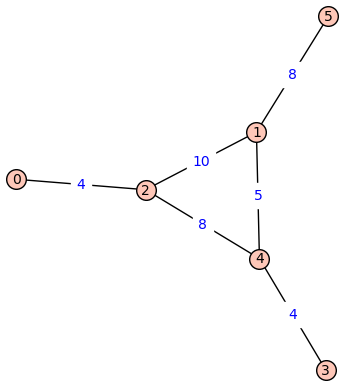

In [54]:
# perform combinatorial optimization using greedy algorithms on a matroid
G = graphs.RandomGNP(6, 0.5)
weights = {e: randint(1, 20) for e in G.edges(labels=False)}

# Actually set the edge weights on the graph
for edge, weight in weights.items():
    G.set_edge_label(edge[0], edge[1], weight)

# Now show with edge labels (no argument needed)
print(G.edges())
G.show(edge_labels=True)

In [55]:
M = Matroid(graph=G)

# Sort edges by descending weight
edges_sorted = sorted(weights, key=lambda e: weights[e], reverse=True)

independent_set = []
for e in edges_sorted:
    if M.is_independent(independent_set + [e]):
        independent_set.append(e)

print("Maximum weight independent set (edges):", independent_set)
print("Total weight:", sum(weights[e] for e in independent_set))

Maximum weight independent set (edges): [(1, 2), (1, 5), (2, 4), (0, 2), (3, 4)]
Total weight: 34


In [60]:
print(independent_set)
print(G.edges(labels=False))
print(['red' if e in independent_set else 'black' for e in G.edges(labels=False)])

[(1, 2), (1, 5), (2, 4), (0, 2), (3, 4)]
[(0, 2), (1, 2), (1, 4), (1, 5), (2, 4), (3, 4)]
['red', 'red', 'black', 'red', 'red', 'red']


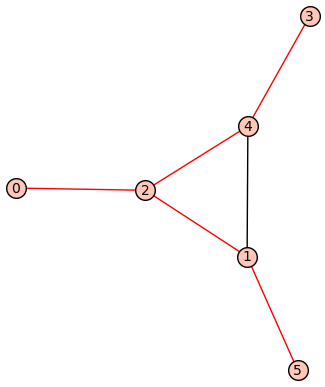

In [75]:
#color the edges of G according to whether they are in the independent set
red_edges = [e for e in G.edges(labels=False) if e in independent_set or (e[1], e[0]) in independent_set]
black_edges = [e for e in G.edges(labels=False) if e not in independent_set and (e[1], e[0]) not in independent_set]
edge_colors = {'red': red_edges, 'black': black_edges}
G.show(edge_colors=edge_colors, edge_labels=False)

In [88]:
# Matroid 1: uniform matroid of rank 2 on E (all subsets of size <= 2 independent)
M1 = matroids.Uniform(2, 4)
print(M1.groundset())

# Matroid 2: uniform matroid of rank 3 on E
M2 = matroids.Uniform(3, 4)
print(M2.groundset())

print("M1 independent sets:", M1.independent_sets())
print("M2 independent sets:", M2.independent_sets())

# Matroid intersection (max common independent set)
I = M1.intersection(M2)
print("Maximum common independent set:", I)

# Weighted matroid intersection
weights = {0: 5, 1: 10, 2: 7, 3: 2}
I_weighted = M1.intersection(M2, weights=weights)
print("Maximum-weight common independent set:", I_weighted)


frozenset({0, 1, 2, 3})
frozenset({0, 1, 2, 3})
M1 independent sets: SetSystem of 11 sets over 4 elements
M2 independent sets: SetSystem of 15 sets over 4 elements
Maximum common independent set: frozenset({0, 1})
Maximum-weight common independent set: frozenset({1, 2})
